# Root Questions - Finite clauseType

In this Notebook, I look at the breakdown of verbs in each kind of questions to understand better the semantic content of different types of questions.

For each wh-question type, I look first at emb_verb, the code for the first verb in the question, then v2_after, and then mat_verb. 

In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [2]:
df = pd.read_json("final_corpus.json")

In [3]:
len(df)

427079

In [4]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]

In [5]:
len(df) #422983

422983

In [6]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [7]:
root = df[df.questType == "Root Question"]

In [8]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# clauseType

In [9]:
mod = root[root.clauseType == "Modal"]
fin = root[root.clauseType == "Finite"]
nonfin = root[root.clauseType == "Non-Finite"]

In [10]:
# nonfin.sentence

# B. Finite

In [11]:
fin_vs = fin.groupby('emb_verb').filter(lambda x: len(x) >= 300)

In [12]:
fin_vs.groupby(["questType", "wh", "emb_verb"])["questType"].count()

questType      wh     emb_verb
Root Question  how    's          1055
                      be          5071
                      do          7069
                      go          94  
                      have        1295
               where  's          2085
                      be          2876
                      do          1664
                      go          220 
                      have        306 
               who    's          1929
                      be          1855
                      do          617 
                      go          37  
                      have        251 
Name: questType, dtype: int64

In [13]:
fin_who = fin.loc[fin.wh.isin(["who"])]
fin_where = fin.loc[fin.wh.isin(["where"])]
fin_how = fin.loc[fin.wh.isin(["how"])]

# B1. Finite How

In [14]:
f_how_vs = fin_how.groupby('emb_verb').filter(lambda x: len(x) >= 100)
f_how_vs_count = f_how_vs.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

In [15]:
f_how_vs_count

,index,emb_verb,count
0,3,do,7069
1,1,be,5071
2,5,have,1295
3,0,'s,1055
4,2,come,187
5,6,’,165
6,4,get,152


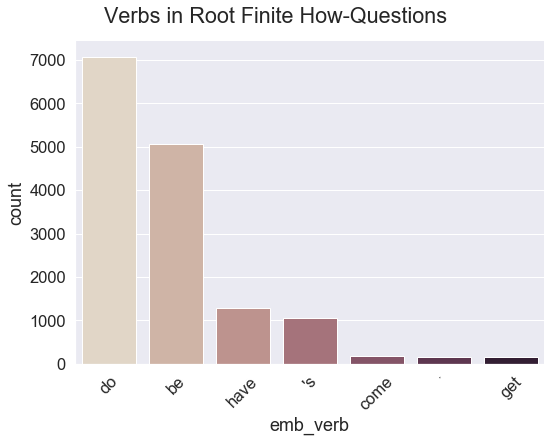

In [16]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=f_how_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Root Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [17]:
f_how_vs_count

,index,emb_verb,count
0,3,do,7069
1,1,be,5071
2,5,have,1295
3,0,'s,1055
4,2,come,187
5,6,’,165
6,4,get,152


In [18]:
# fin_how.loc[fin_how.emb_verb.isin(["do"])].sentence

## v2_after

In [19]:
# first filter so its not a super long list. We want to see the most frequent ones.
f_how_v2s = f_how_vs.groupby('v2_after').filter(lambda x: len(x) >= 300)
f_how_vs_v2_count = f_how_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts for those most frequent verbs
f_how_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
's                    828 
          been        11  
          do          2   
          going       67  
          know        1   
be                    2480
          been        2   
          do          43  
          get         12  
          going       269 
          know        30  
come                  79  
          do          8   
          get         4   
          know        6   
do                    561 
          do          369 
          get         670 
          going       1   
          know        963 
get                   103 
          do          2   
          get         3   
          know        3   
have                  49  
          been        326 
          do          4   
          going       1   
          know        1   
’                     128 
Name: v2_after, dtype: int64

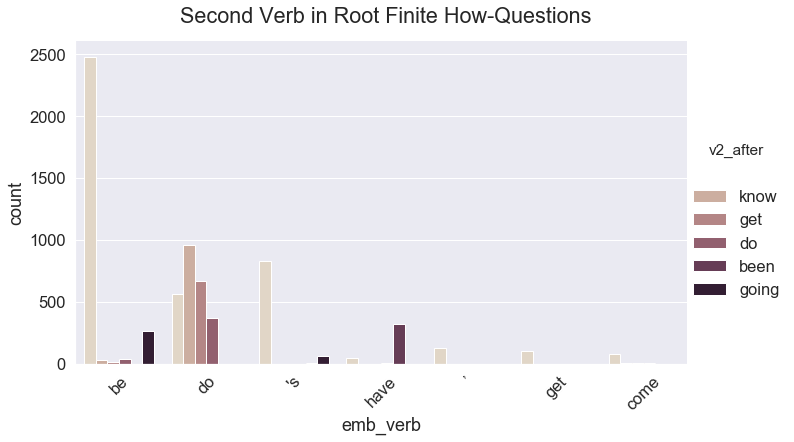

In [21]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=f_how_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [146]:
# what about the ones with no v2_after?
a = f_how_v2s.loc[f_how_v2s.emb_verb.isin(["do"])]
# a.loc[a.v2_after.isin([""])].sentence

In [145]:
# Look at sentences
# f_how_v2s.loc[f_how_v2s.emb_verb.isin(["have"])].sentence

### What are the v3_after?
Answer: there are none.

In [113]:
f_how_v3s = f_how_v2s.groupby('v3_after').filter(lambda x: len(x) >= 300)
f_how_v3s.groupby(['emb_verb','v2_after','v3_after'])['emb_verb'].count()

emb_verb  v2_after  v3_after
's                              828 
          been                  3   
          do                    1   
          going                 44  
          know                  1   
be                              2480
          been                  1   
          do                    10  
          get                   9   
          going                 60  
          know                  11  
do                              561 
          do                    247 
          get                   450 
          going                 1   
          know                  357 
have                            49  
          been                  146 
          do                    4   
          know                  1   
Name: emb_verb, dtype: int64

# B2. Finite Where

In [147]:
f_where_vs = fin_where.groupby('emb_verb').filter(lambda x: len(x) >= 50)

In [148]:
f_where_vs_count = f_where_vs.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

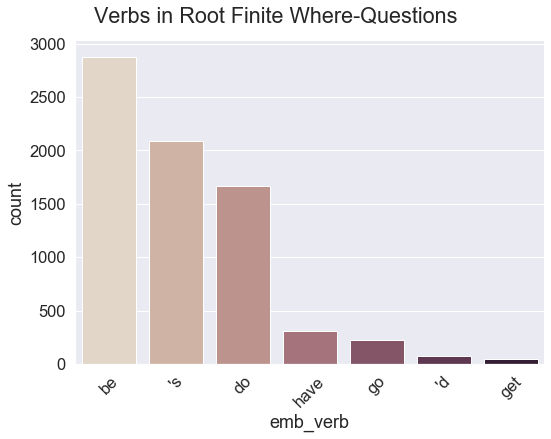

In [156]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=f_where_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Root Finite Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [151]:
f_where_vs_count

,emb_verb,count
2,be,2876
1,'s,2085
3,do,1664
6,have,306
5,go,220
0,'d,70
4,get,50


In [211]:
fin_where.loc[fin_where.emb_verb.isin(["do"])].sentence

1535      So where does that leave research ?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2631      Where about do you cut your peats?                                                                                                                                                                                                                                                                                                                                                                            

### What about v2_after?

In [212]:
f_where_vs_v2 = f_where_vs.groupby('v2_after').filter(lambda x: len(x) >= 150)
f_where_vs_v2_count = f_where_vs_v2.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
f_where_vs_v2.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
'd        come        7   
          get         25  
          go          8   
's                    1588
          come        12  
          get         3   
          go          12  
          going       45  
          gone        141 
be                    1697
          come        7   
          get         2   
          go          9   
          going       285 
          gone        6   
do                    118 
          come        137 
          get         248 
          go          312 
          gone        1   
get                   38  
          go          3   
go                    182 
          get         1   
          go          3   
          gone        1   
have                  22  
          come        31  
          go          2   
          gone        57  
Name: v2_after, dtype: int64

In [207]:
len(f_where_vs_v2)/len(f_where_vs)*100

68.80759180305323

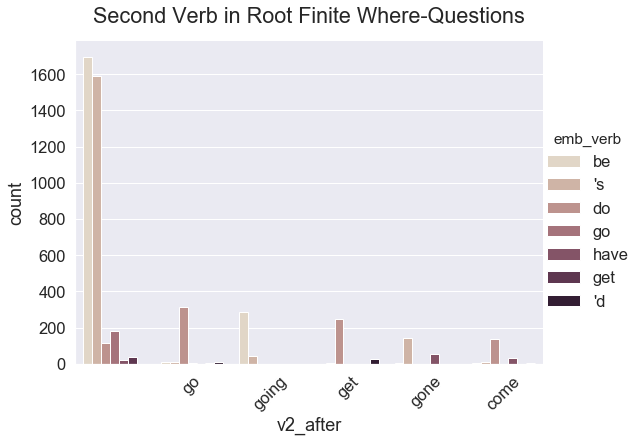

In [214]:
sns.set(font_scale=1.5)
g = sns.catplot(x="v2_after", y="count",hue="emb_verb", kind="bar", data=f_where_vs_v2_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Finite Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [226]:
# f_where_vs_v2.loc[f_where_vs_v2.emb_verb == "'d"].sentence

# B3. Finite Who

In [227]:
f_who_vs = fin_who.groupby('emb_verb').filter(lambda x: len(x) >= 100)

In [228]:
f_who_vs.groupby(["emb_verb"])["emb_verb"].count()

emb_verb
's      1929
be      1855
do      617 
have    251 
know    216 
say     199 
want    126 
Name: emb_verb, dtype: int64

In [229]:
f_who_vs_count = f_who_vs.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [230]:
f_who_vs_count

,emb_verb,count
0,'s,1929
1,be,1855
2,do,617
3,have,251
4,know,216
5,say,199
6,want,126


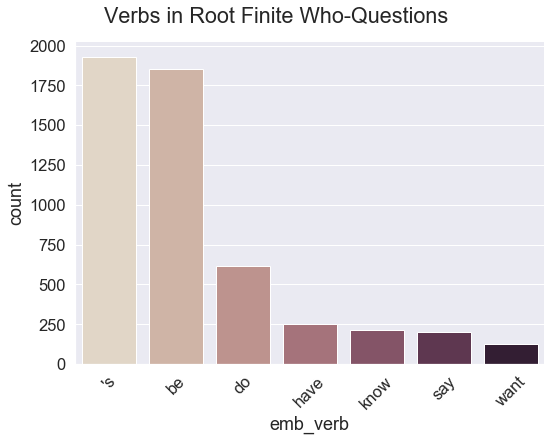

In [231]:
# It's weird to make a graph of this because there are so many occurrences of 'be' that overwhelm the rest.
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=f_who_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Root Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

## v2_after

In [239]:
f_who_vs_v2 = f_who_vs.groupby('v2_after').filter(lambda x: len(x) >= 75)
f_who_vs_v2_count = f_who_vs_v2.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
f_who_vs_v2.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
's                    1188
          going       80  
          got         87  
          is          55  
          think       1   
be                    1113
          going       58  
          got         3   
          is          14  
          think       1   
do                    202 
          going       1   
          is          3   
          think       94  
have                  84  
          got         25  
          is          2   
know                  104 
          is          7   
          think       2   
say                   117 
          is          9   
want                  51  
          is          1   
Name: v2_after, dtype: int64

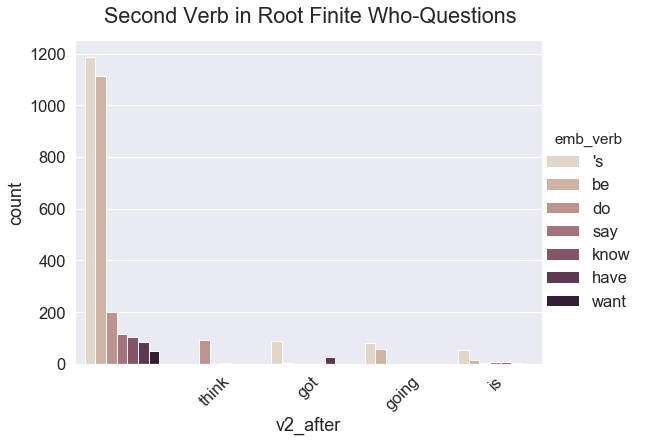

In [242]:
sns.set(font_scale=1.5)
g = sns.catplot(x="v2_after", y="count",hue="emb_verb", kind="bar", data=f_who_vs_v2_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [250]:
# f_who_vs_v2.loc[f_who_vs_v2.emb_verb == "want"].sentence

## BE

To Do: (3/22)
1. LOOK AT PLURAL VERSUS SINGULAR

In [20]:
f_who_be = fin_who[fin_who.emb_verb.isin(["be"])]

In [22]:
f_who_be.sentence

246       The Government can choose who it does business with and the Government usually chooses to do business with people whom it thinks are trustworthy , who are not going to commit fraud with federal dollars ," he said .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
247       The Government can choose who it does business with and the Government usually chooses to do business with people whom it thinks are trustworthy , who are not going to commit fraud with federal dollars ," he said .                                                                      

### Try to take a look at v2_after

In [15]:
t = f_who_be.groupby(["v2_after"]).filter(lambda x: len(x) >= 50)

In [16]:
t.groupby("v2_after")["v2_after"].count()

v2_after
    675
Name: v2_after, dtype: int64

In [19]:
t.sentence

3546      He knows who we are.’                                                                                                                                                                   
4835      What he thinks is who he is.                                                                                                                                                            
5705      It does not say who they are.                                                                                                                                                           
8924      Look at the pictures and try to guess who is who.                                                                                                                                       
13653     He knew, without having to ask, who the man in question was.                                                                                                                            
14670     Do you know who

### Try to look at the mat_verb distribution 

In [29]:
m = f_who_be.groupby(["mat_verb"]).filter(lambda x: len(x) >= 20)
m.groupby("mat_verb")["mat_verb"].count()

mat_verb
's          49 
ask         26 
be          115
depend      26 
find        51 
know        670
remember    47 
say         43 
see         46 
think       31 
wonder      45 
Name: mat_verb, dtype: int64

In [30]:
m_count = m.groupby(["mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

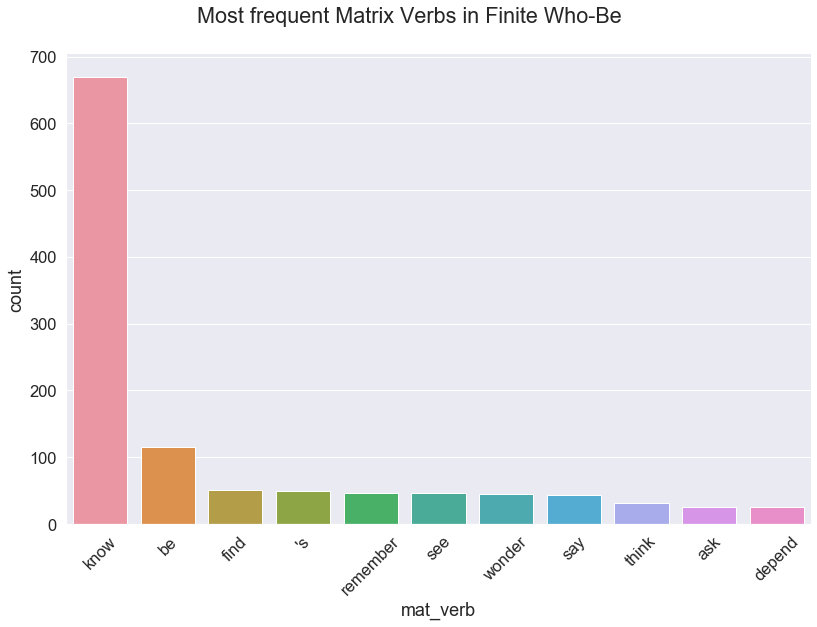

In [32]:
sns.set(font_scale=1.5)
g = sns.catplot(x="mat_verb", y="count", kind="bar", data=m_count, height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Most frequent Matrix Verbs in Finite Who-Be')
g.set_xticklabels(rotation=45)

plt.show()

### know-who-is

In [35]:
know_f_who_be = f_who_be[f_who_be.mat_verb.isin(["know"])]

In [36]:
len(know_f_who_be)

670

In [37]:
know_f_who_be.sentence

3546      He knows who we are.’                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3983      Officials usually knew who they were, though they could not obtain the evidence needed to convict them in the courts.                                                                                                                                                                       

In [39]:
know_f_who_be_count = know_f_who_be.groupby(["v1_after"])["v1_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)

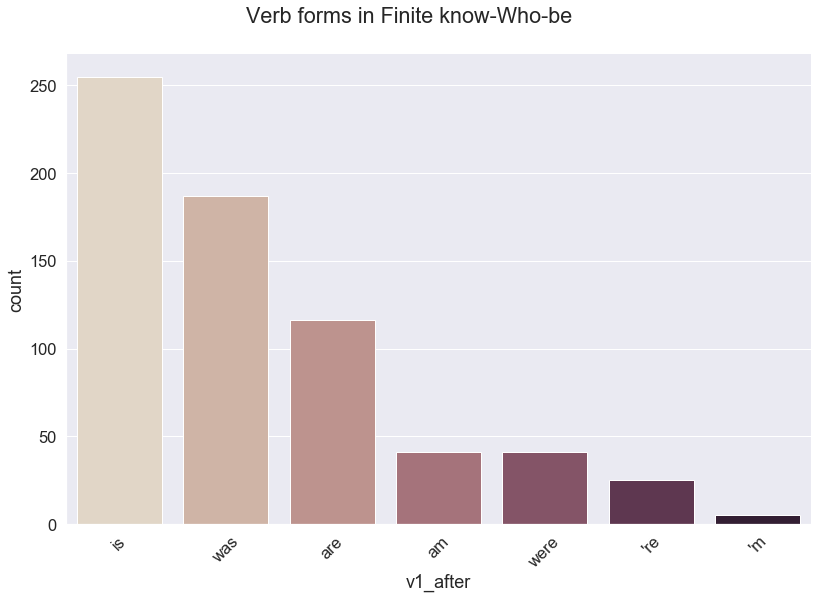

In [42]:
sns.set(font_scale=1.5)
g = sns.catplot(x="v1_after", y="count", kind="bar", data=know_f_who_be_count, palette="ch:.25", height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verb forms in Finite know-Who-be')
g.set_xticklabels(rotation=45)

plt.show()

### DO

In [52]:
f_who_do = fin_who[fin_who.emb_verb.isin(["do"])]

In [53]:
f_who_do.sentence

20386     I mean, who does he think he is?                                                                                                                                                                                                                                                                                                                                                                                                                                                         
21373     I don't know who you do that                                                                                                                                                                                                                                                                                                                                                                                                                                                             
21383     I know who done it.   

### HAVE

In [49]:
f_who_have = fin_who[fin_who.emb_verb.isin(["have"])]

In [50]:
f_who_have.sentence

6827      I then went on to think about who had clipped Secretary of State Samson's golden locks and, once again, I realised that it was the right hon. Member for Finchley.                                                                                                                                                                                                                                                       
6830      It is best to be candid also about who one has consulted.                                                                                                                                                                                                                                                                                                                                                                
9909      He neither knew nor cared who had been evicted from it and left destitute.                                                                            

### 'S

In [62]:
f_who_s = fin_who[fin_who.emb_verb.isin(["'s"])]

In [63]:
len(f_who_s)

422

In [60]:
f_who_s.sentence

5661      They would also want to know who markets the food and its price.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
9372      Of course, the Flat parts of the cards don't suffer, but then who's interested in Flat racing at Down Royal and Downpatrick.                                                                                                                                                                                                                                                                                                             

In [66]:
m = f_who_s.groupby(["v2_after"]).filter(lambda x: len(x) >= 10)
m.groupby("v2_after")["v2_after"].count()

v2_after
         203
's       10 
been     10 
going    19 
got      15 
is       12 
Name: v2_after, dtype: int64